In [25]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, sys
import glob
from funciones_flag import *
from matplotlib.colors import to_rgba

In [26]:
dictflag = {'Caso':['Full','Segmented rectangular','Segmented Triangular'],'f_bistable':np.zeros((3)),'f_flutter':np.zeros((3)),'U_bistable':np.zeros((3)),'U_flutter':np.zeros((3))}
A = pd.DataFrame.from_dict(dictflag)

A.iloc[0,1] = 11.9
A.iloc[0,2]= 16.3
A.iloc[1,1] = 16.6
A.iloc[1,2] = 25.9
A.iloc[2,1] = 11.4
A.iloc[2,2] = 20
print('')




#identificacion de ensayos
dirlist = np.sort(glob.glob('/home/juan/data/balseiro/*'))
dirlist = np.array([list_i.split('/')[-1]  for list_i in dirlist])
dictfiles = {'medida':dirlist,'nombre carpeta':dirlist}
styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "150%"),
                              ("color", 'green') ])]
display(A.style.set_caption('Resumen intevalos estabilidad'))

,Caso,f_bistable,f_flutter,U_bistable,U_flutter
0,Full,11.900000,16.300000,0.000000,0.000000
1,Segmented rectangular,16.600000,25.900000,0.000000,0.000000
2,Segmented Triangular,11.400000,20.000000,0.000000,0.000000


,medida,nombre carpeta
0,Segmented rect - 0 - Reference 1,vid_2025-02-24_15-19-57
1,Segmented rect - 17.2 - Mode 0,vid_2025-02-24_15-24-10
2,Segmented rect - 17.2 - Mode 0 - b,vid_2025-02-24_15-30-07
3,Segmented rect - 17.2 - Mode 1,vid_2025-02-24_15-34-16
4,Segmented rect - 16.9 - Mode 1,vid_2025-02-24_15-43-25
5,Full - 13.4 - Mode 1,vid_2025-02-24_15-48-03
6,Full - 13.4 - Mode 0,vid_2025-02-24_15-56-03
7,Full - 0 - Reference 1,vid_2025-02-24_16-00-23
8,Full - 17.2 - Mode 1,vid_2025-02-24_16-04-16
9,Full - 0 - Reference 2,vid_2025-02-24_16-11-02


,medida,nombre carpeta,freq motor
0,full,vid_2025-02-24_19-34-14,20.000000
1,full,vid_2025-02-24_19-36-28,19.000000
2,full,vid_2025-02-24_19-40-24,18.000000
3,full,vid_2025-02-24_19-42-47,17.000000
4,full,vid_2025-02-24_19-45-21,16.000000
5,full,vid_2025-02-24_19-48-30,15.000000
6,full,vid_2025-02-24_19-52-25,14.000000
7,full,vid_2025-02-24_19-55-09,13.000000
8,full,vid_2025-02-24_19-58-59,12.800000
9,full,vid_2025-02-24_20-02-35,12.200000


,Caso,f_bistable,f_flutter,U_bistable,U_flutter,L,$f_{kh}1$,$f_{kh}2$,$f_n1$,$f_n2$
4,L4,21.000000,22.000000,13.807091,14.558998,7.000000,12.622165,13.451447,4.630268,29.017393
3,L3,14.900000,21.600000,9.220458,14.258235,8.000000,7.775248,13.118680,3.545049,22.216442
5,L5,14.200000,22.500000,8.694124,14.934951,9.000000,7.245731,13.869340,2.801026,17.553732
2,L2,14.400000,25.500000,8.844505,17.190672,10.500000,7.396384,16.419603,2.057897,12.896619
0,L0,11.900000,16.300000,6.964737,10.273128,13.000000,5.552607,8.852266,1.342504,8.413327
1,L1,10.200000,16.800000,5.686496,10.649082,15.500000,4.353363,9.242422,0.944363,5.918220


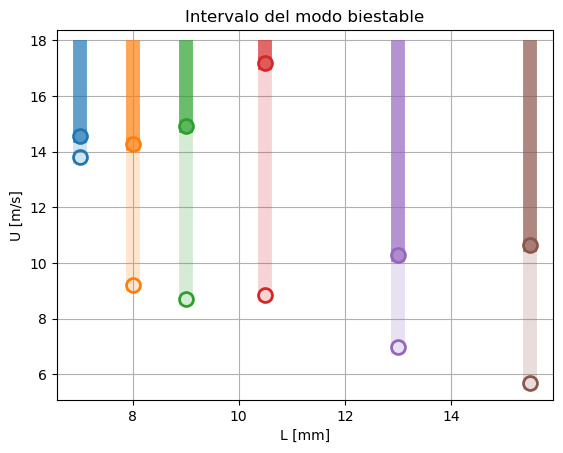

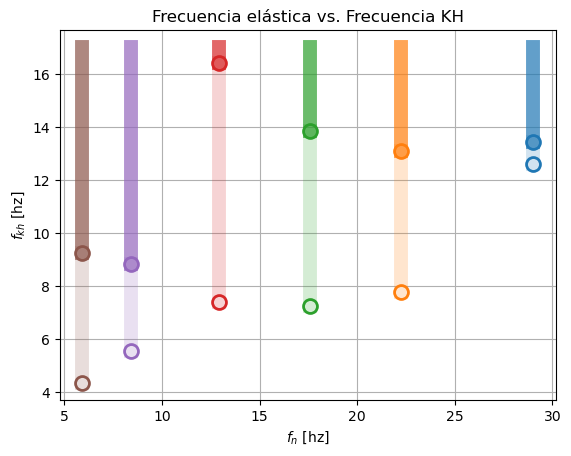

In [37]:

B = pd.DataFrame.from_dict(dictfiles)

# raise ValueError()
B = B.drop(range(15))
B = B.reset_index(drop=True)
C = B.copy()
C = C.drop(range(15))
C = C.reset_index(drop=True)
B.iloc[0,0] = 'Segmented rect - 0 - Reference 1'
B.iloc[1,0] = 'Segmented rect - 17.2 - Mode 0'
B.iloc[2,0] = 'Segmented rect - 17.2 - Mode 0 - b'
B.iloc[3,0] = 'Segmented rect - 17.2 - Mode 1'
B.iloc[4,0] = 'Segmented rect - 16.9 - Mode 1'
B.iloc[5,0] = 'Full  - 13.4 - Mode 1'
B.iloc[6,0] = 'Full  - 13.4 - Mode 0'
B.iloc[7,0] = 'Full  - 0 - Reference 1'
B.iloc[8,0] = 'Full  - 17.2 - Mode 1'
B.iloc[9,0] = 'Full  - 0 - Reference 2'
B.iloc[10,0] = 'Segmented triang - 13.4 - Mode 0'
B.iloc[11,0] = 'Segmented triang - 13.4 - Mode 1'
B.iloc[12,0] = 'Segmented triang - 17.2 - Mode 1'
B.iloc[13,0] = 'Segmented triang - 0 - Reference 1'
B = B.drop(range(14,42))
#display(B.style.set_caption("Resumen medidas 3D").set_table_styles(styles))


display(B.style.set_caption('Resumen medidas 3D'))
C.iloc[0:10,0] = 'full'
C.iloc[10:15,0] = 'rect'
C.iloc[15:17,0] = 'full'
C.iloc[17:,0] = 'triang'
freqs1 = np.arange(20.,12,-1)
freqs1 = np.hstack((freqs1,[12.8,12.2]))
freqs2 = np.arange(20.,15,-1)
freqs3 = np.arange(20,11,-1)
freqs3 = np.hstack((freqs3,[11.5]))
freqs = np.hstack((freqs1,freqs2,[17.2,13.4],freqs3))
C['freq motor'] = freqs

display(C.style.set_caption('Resumen medidas 2D'))


dictflag_L = {'Caso':['L0','L1','L2','L3','L4','L5'],'f_bistable':np.zeros((6)),'f_flutter':np.zeros((6)),'U_bistable':np.zeros((6)),'U_flutter':np.zeros((6))}
D = pd.DataFrame.from_dict(dictflag_L)

D.iloc[0,1] = 11.9
D.iloc[0,2]= 16.3
D.iloc[1,1] = 10.2
D.iloc[1,2] = 16.8
D.iloc[2,1] = 14.4
D.iloc[2,2] = 25.5
D.iloc[3,1] = 14.9
D.iloc[3,2] = 21.6
D.iloc[4,1] = 21
D.iloc[4,2] = 22
D.iloc[5,1] = 14.2
D.iloc[5,2] = 22.5
D['L'] = np.array([13,15.5,10.5,8,7,9])


D['U_bistable'] = veloc_tunel_ib(D['f_bistable'])
D['U_flutter'] = veloc_tunel_ib(D['f_flutter'])

A['U_bistable'] = veloc_tunel_ib(A['f_bistable'])
A['U_flutter'] = veloc_tunel_ib(A['f_flutter'])


# print(f'${{f_n}}_1= {Papel_80.fn[0]:.3f}$Hz')
# print(f'${{f_n}}_2= {Papel_80.fn[1]:.3f}$Hz')

rhoa = 1.2
rhoa_b = 1.0888  #densidad aire de bariloche
nu = 1.5e-5*rhoa_b / rhoa
Uinf = 12
delta_cl = 18e-3 # espesor de capa limite para velocidad 12m/s

#longitud caracteristica de la placa plana (tunel) en base a la medicion en Balseiro
x_carac = longitud_equivalente_capa_limite_turbulenta(delta_cl,Uinf,nu)

delta1 = delta_turb(x_carac,D['U_bistable'],nu)
delta2 = delta_turb(x_carac,D['U_flutter'],nu)
D['$f_{kh}1$'] =  0.032*D['U_bistable']/2/delta1
D['$f_{kh}2$'] =  0.032*D['U_flutter']/2/delta2

f_n1 = np.zeros_like(D['U_bistable'])
f_n2 = np.zeros_like(D['U_bistable'])
for i,Li in enumerate(D['L']):
       Papel_80.L = Li*1e-2
       Papel_80.freq_nat()
       f_n1[i] = Papel_80.fn[0]
       f_n2[i] = Papel_80.fn[1]
D['$f_n1$'] = f_n1
D['$f_n2$'] = f_n2
#theta0 = delta_cl
#Um = Uinf / 2
#f_kh = 0.032*Um/theta0
#theta0 = 0.032*Um/f_kh
D =  D.sort_values('L')

display(D.style.set_caption('Resumen intevalos estabilidad L variable'))



fig,ax = plt.subplots()
for i,Li in enumerate(D['L']):
       l, = ax.plot([Li,Li],D.iloc[i,3:5],'-o')
       colork  = l.get_color()
       l.set_linewidth(10)
       l.set_markeredgewidth(2)
       l.set_markeredgecolor(colork)
       l.set_fillstyle('none')
       l.set_markersize(10)

       l.set_color(to_rgba(colork,0.2))
ymax  = ax.get_ybound()[1]
plt.gca().set_prop_cycle(None)
for i,Li in enumerate(D['L']):
       l, = ax.plot([Li,Li],[D.iloc[i,4],ymax],'-')
       l.set_linewidth(10)
       colork  = l.get_color()
       l.set_color(to_rgba(colork,0.7))
ax.set_xlabel('L [mm]')
ax.set_ylabel('U [m/s]')
ax.set_title('Intervalo del modo biestable')
ax.grid()

fig1,ax1 = plt.subplots()
for i,Li in enumerate(D['$f_n2$']):
       l, = ax1.plot([Li,Li],D.iloc[i,6:8],'-o')
       colork  = l.get_color()
       l.set_linewidth(10)
       l.set_markeredgewidth(2)
       l.set_markeredgecolor(colork)
       l.set_fillstyle('none')
       l.set_markersize(10)

       l.set_color(to_rgba(colork,0.2))
ymax  = ax1.get_ybound()[1]
plt.gca().set_prop_cycle(None)
for i,Li in enumerate(D['$f_n2$']):
       l, = ax1.plot([Li,Li],[D.iloc[i,7],ymax],'-')
       l.set_linewidth(10)
       colork  = l.get_color()
       l.set_color(to_rgba(colork,0.7))
ax1.set_xlabel(r'$f_n$ [hz]')
ax1.set_ylabel(r'$f_{kh}$ [hz]')
ax1.grid()
ax1.set_title('Frecuencia elástica vs. Frecuencia KH')

A.to_csv('Intervalos_estabilidad.csv')
B.to_csv('casos_3D_lista_archivos.csv')
C.to_csv('casos_2D_lista_archivos.csv')
D.to_csv('Estabilidad_L_variable.csv')

In [35]:
fig.savefig('figures/stability_ranges_1.png')
fig1.savefig('figures/stability_ranges_2.png')

(5.111286839288279, 17.765880983924266)